In [1]:
# pip install bitarray 
from bitarray import bitarray

# pip install mmh3  --> for murmur hash function
import mmh3
import matplotlib.pyplot as plt

In [2]:
# import input_taker  
from input_taker import *
# from input_taker import input_taking_with_different_no_of_hash
from ip_generator import *

from plotter import *

# BloomFilter Class

In [3]:
# bloom filter class
class BloomFilter:
    def __init__(self, size, no_of_hash, multiplier):
        self.size = size
        self.multiplier = multiplier
        self.filter = bitarray(self.size * multiplier)  
        self.filter.setall(0) 
        self.no_of_hash = no_of_hash
        self.seeds = [i * 31 + 7 for i in range(no_of_hash)] # prime no helps to take a good seed value for better distribution


    def add(self, ip):
        for i in range(0,self.no_of_hash):
            hash_value = mmh3.hash(ip, seed=self.seeds[i]) & 0x7FFFFFFF  # Ensures positive hash values
            self.filter[hash_value % (self.size * self.multiplier)] = True




    def exists(self, ip):
        for i in range(self.no_of_hash):
            hash_value = mmh3.hash(ip, seed=self.seeds[i]) & 0x7FFFFFFF 
            if not self.filter[hash_value % (self.size * self.multiplier)]:
                return False
        return True

<span style="background-color:rgb(235, 235, 235); padding: 6px; font-size: 30px; font-weight: bold;">Main Method</span> 

In [4]:
if __name__ == "__main__":

    #input taking 
    sz, no_of_hash, multiplier = inputTaking()

    # Generate a file named "ip_addresses.txt" with sz no of random IPs
    generate_ip_file("ip_addresses.txt", sz)

    print()
    print(f"Value Entered >>>\nSize of array : {sz} \nNumber of hash functions: {no_of_hash}\nMultiplier: {multiplier}")
    print()

    filter_bloom1 = BloomFilter(sz, no_of_hash, multiplier)

    # Reading IP addresses from file "ip_addresses.txt"
    ip_addresses = read_ip_file("ip_addresses.txt")

    # adding first half of the IP addresses in the bloom filter then check for all 
    trained_cnt = 0
    for ip in ip_addresses[:len(ip_addresses) // 2]:  
        filter_bloom1.add(ip)
        trained_cnt += 1

    
    cnt_true = 0 # will count no of true bloom filter is saying 
    for ip in ip_addresses:
        if filter_bloom1.exists(ip) == True:
            cnt_true += 1
    
    false_positive = 0
    if len(ip_addresses) != trained_cnt:
        false_positive = (cnt_true - trained_cnt) / (len(ip_addresses) - trained_cnt)

    print(f"False positive rate: {false_positive:.2%}")     


Value Entered >>>
Size of array : 1000 
Number of hash functions: 4
Multiplier: 4

False positive rate: 3.60%


<span style="background-color: lightgrey; padding: 6px; font-size: 27px; font-weight: bold;">false_positive &nbsp; V/S &nbsp; no_of_hash_used</span>

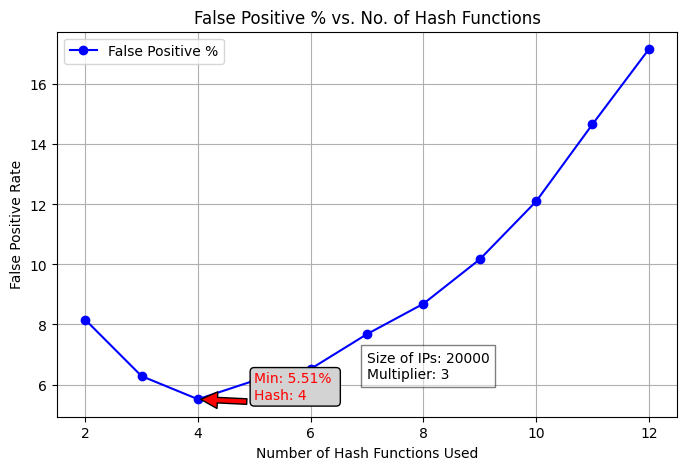

In [ ]:
sz, no_of_hash, multiplier = input_taking_with_different_no_of_hash()
generate_ip_file("ip_addresses.txt", sz)
ip_addresses = read_ip_file("ip_addresses.txt")
false_positives = []


for i in range(2,no_of_hash+1):
    filter_bloom1 = BloomFilter(sz, i, multiplier)
    trained_cnt = 0
    for ip in ip_addresses[:len(ip_addresses) // 2]:  
        filter_bloom1.add(ip)
        trained_cnt += 1

    
    cnt_true = 0 # will count no of true bloom filter is saying 
    for ip in ip_addresses:
        if filter_bloom1.exists(ip) == True:
            cnt_true += 1
    
    
    false_positive = 0

    if len(ip_addresses) != trained_cnt:
        false_positive = (cnt_true - trained_cnt)*100 / (len(ip_addresses) - trained_cnt)

    false_positives.append(false_positive)

plotGraph(no_of_hash, false_positives, sz, multiplier)
